# Predizer Complicações de Infarto do Miocárdio
## Por Gustavo Almeida Valentim - 202014468

## Importando Bibliotecas que irei utilizar: 

In [70]:
import pandas as pd
from imblearn.combine import SMOTEENN
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis)
from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix, f1_score, precision_score)
from sklearn.model_selection import (StratifiedKFold, cross_val_score,train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from matplotlib import pyplot
from sklearn.metrics import recall_score

## Carregando minha Base de dados: 

In [9]:
# Load dataset
data = r'C:\Users\Gustavo Valentim\OneDrive\Área de Trabalho\python\mi_project\MI.csv'
names = list()
first_day = [92, 93, 94, 99, 100, 101, 102, 103, 104]
for i in range(124):
   names.append(i)
# transforma em data frame
dataset_df = pd.read_csv(data, names=names)
# cópia
data_pre = dataset_df.copy()
# remove colunas dia3
data_third = data_pre.drop(columns=[0])
names.remove(0)
data_third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, 1 to 123
dtypes: int64(13), object(110)
memory usage: 1.6+ MB


## Perceba que temos muitos dados como Object devido às "?"

Nesse caso devemos tratar, transformei todos em Nan,e coloquei a mediana em cada argumento faltante, visto que todas as linhas tinham dados faltantes:

In [23]:
for i in names:
   # converte a coluna para um tipo númerico
   data_third[i] = pd.to_numeric(data_third[i], errors='coerce')
   # data_third[i] = pd.to_numeric(data_third[i], errors= 'coerce')
for colums in names:
   mediana = data_third[colums].median()
   data_third[colums] = data_third[colums].fillna(mediana)
data_third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, 1 to 123
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


## Preparar a Base em 2 conjuntos (treinamento e teste)(70% e 30%)

In [104]:
data_first = data_third.drop(columns=first_day)
array = data_third.values
array_f = data_first.values
X = array[:, :111]
y = array[:, 119]  # the last is 122
X_f = array_f[:, :102]
y_f = array_f[:, 113]  # the last is 113
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)
X_ftrain, X_fvalidation, Y_ftrain, Y_fvalidation = train_test_split(X_f, y_f, test_size=0.30, random_state=1)

## Testar os algoritmos de classificação: 

## Resolvi testar o QDA muitas de nossas varíaveis são colineares com isso resolvi não seguir com esse algoritmo, já que para resolver isso muitos dados iam ser perdidos

In [78]:
# Spot Check Algorithms
models = []
models.append(('QDA', QuadraticDiscriminantAnalysis()))
# evaluate each model in turn
results = []
results_f = []
nomes = []
for name, model in models:
   # oito pois a saida sao oito grupos antes estava 10
   kfold = StratifiedKFold(n_splits=8, random_state=1, shuffle=True)
   cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
   cv_results_f = cross_val_score(model, X_ftrain, Y_ftrain, cv=kfold, scoring='accuracy')
   results_f.append(cv_results_f)
   results.append(cv_results)
   nomes.append(name)
   print('Terceiro dia  = %s: %f (%f)' %(name, cv_results.mean(), cv_results.std()))

C:\Users\Gustavo Valentim\OneDrive\Área de Trabalho\python\venv\Lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Gustavo Valentim\OneDrive\Área de Trabalho\python\venv\Lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Gustavo Valentim\OneDrive\Área de Trabalho\python\venv\Lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Gustavo Valentim\OneDrive\Área de Trabalho\python\venv\Lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Gustavo Valentim\OneDrive\Área de Trabalho\python\venv\Lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Terceiro dia  = QDA: 0.824375 (0.007687)


C:\Users\Gustavo Valentim\OneDrive\Área de Trabalho\python\venv\Lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Gustavo Valentim\OneDrive\Área de Trabalho\python\venv\Lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Gustavo Valentim\OneDrive\Área de Trabalho\python\venv\Lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Gustavo Valentim\OneDrive\Área de Trabalho\python\venv\Lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Gustavo Valentim\OneDrive\Área de Trabalho\python\venv\Lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Com esse estudo resolvi continuar nossa avaliação apenas com o LDA, KNN E CART

## Verificando Primeiro dia e Terceiro Dia

In [79]:
# Spot Check Algorithms
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
results_f = []
nomes = []
for name, model in models:
   # oito pois a saida sao oito grupos antes estava 10
   kfold = StratifiedKFold(n_splits=8, random_state=1, shuffle=True)
   cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
   cv_results_f = cross_val_score(model, X_ftrain, Y_ftrain, cv=kfold, scoring='accuracy')
   results_f.append(cv_results_f)
   results.append(cv_results)
   nomes.append(name)
   print('Primeiro dia  = %s: %f (%f)' %(name, cv_results_f.mean(), cv_results_f.std()))
   print('Terceiro dia  = %s: %f (%f)' %(name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
#pyplot.boxplot(results, labels=nomes)
#pyplot.title('Algorithm Comparison')
#pyplot.show()

Primeiro dia  = LDA: 0.809286 (0.027689)
Terceiro dia  = LDA: 0.808447 (0.031883)
Primeiro dia  = CART: 0.739457 (0.027873)
Terceiro dia  = CART: 0.758032 (0.026466)
Primeiro dia  = KNN: 0.851272 (0.011204)
Terceiro dia  = KNN: 0.850427 (0.011418)


Percebemos claramente que o Terceiro dia nos apresentou uma acurácia maior na maioria dos algoritmos de classificação, então irei prosseguir apenas com os métodos do terceiro dia, além de me oferecer um maior número de dados.

## Buscando melhores algoritmos

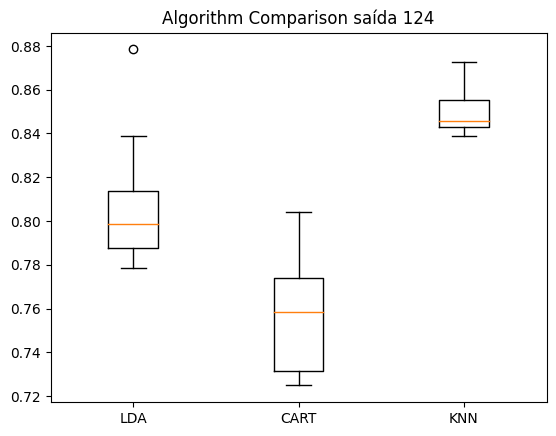

In [96]:
# Compare Algorithms
pyplot.boxplot(results, labels=nomes)
pyplot.title('Algorithm Comparison saída 124')
pyplot.show()

## Como nosso Data Set é muito desbalanceado em todas as saidas Y vamos utilizar o método SMOTEENN, afim de manter as saídas mais estabilizadas:

fontes : (https://www.youtube.com/watch?v=EqIQTN65IZs)(https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html)

In [106]:
sm = SMOTEENN(random_state=2)
X_train, Y_train = sm.fit_resample(X_train, Y_train.ravel())

In [74]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
f1 = f1_score(Y_validation, predictions)
print('114. Supraventricular tachycardia (PREDS_TAH): Nominal')
print(recall_score(Y_validation, predictions))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print('f1_score: ', f1)

114. Supraventricular tachycardia (PREDS_TAH): Nominal
0.8333333333333334
0.8450980392156863
[[426  78]
 [  1   5]]
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92       504
         1.0       0.06      0.83      0.11         6

    accuracy                           0.85       510
   macro avg       0.53      0.84      0.51       510
weighted avg       0.99      0.85      0.91       510

f1_score:  0.11235955056179775


In [75]:
model = DecisionTreeClassifier()
model.fit(X_train_sen, Y_train_sen)
predictions = model.predict(X_validation)
# Evaluate predictions
f1 = f1_score(Y_validation, predictions)
print('114. Supraventricular tachycardia (PREDS_TAH): Nominal')
print(recall_score(Y_validation, predictions))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print('f1_score: ', f1)

114. Supraventricular tachycardia (PREDS_TAH): Nominal
0.16666666666666666
0.9450980392156862
[[481  23]
 [  5   1]]
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       504
         1.0       0.04      0.17      0.07         6

    accuracy                           0.95       510
   macro avg       0.52      0.56      0.52       510
weighted avg       0.98      0.95      0.96       510

f1_score:  0.06666666666666667


In [76]:
model = KNeighborsClassifier()
model.fit(X_train_sen, Y_train_sen)
predictions = model.predict(X_validation)
# Evaluate predictions
f1 = f1_score(Y_validation, predictions)
print('114. Supraventricular tachycardia (PREDS_TAH): Nominal')
print(recall_score(Y_validation, predictions))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print('f1_score: ', f1)

114. Supraventricular tachycardia (PREDS_TAH): Nominal
0.0
0.7156862745098039
[[365 139]
 [  6   0]]
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83       504
         1.0       0.00      0.00      0.00         6

    accuracy                           0.72       510
   macro avg       0.49      0.36      0.42       510
weighted avg       0.97      0.72      0.82       510

f1_score:  0.0


Vemos nestes três algoritmos que apesar de árvore de decisão dar a maior acurácia, no ramo da saúde, devemos prezar pela maior precaução, exemplo: Se minha máquina apontar que dará negativo para algum paciente em alguma complicação, porém no futuro ele acabar por tê-la, é pior do que se meu programa apontar positivo e no futuro ele não ter, neste caso o algoritmo de LDA se saiu na frente visto que em 6 casos, ele preveu 5 corretamente e deu um como erro, apresentando recall de 83%. 

## Melhor algoritmo considerando esta base de dados é o que apresentar maior Recall

Outros exemplos de saídas: 

In [93]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions

print('124. Lethal outcome (cause) (LET_IS): Structure')
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


124. Lethal outcome (cause) (LET_IS): Structure
0.5431372549019607
[[256  19  10  66  25   8  37  16]
 [  3  11   0   5   1   1   4   1]
 [  2   0   0   0   0   0   1   1]
 [  4   2   1   6   2   1   2   0]
 [  1   0   0   4   2   0   0   1]
 [  2   0   1   0   0   0   0   1]
 [  1   0   3   1   1   0   0   1]
 [  3   0   0   1   0   0   0   2]]
              precision    recall  f1-score   support

         0.0       0.94      0.59      0.72       437
         1.0       0.34      0.42      0.38        26
         2.0       0.00      0.00      0.00         4
         3.0       0.07      0.33      0.12        18
         4.0       0.06      0.25      0.10         8
         5.0       0.00      0.00      0.00         4
         6.0       0.00      0.00      0.00         7
         7.0       0.09      0.33      0.14         6

    accuracy                           0.54       510
   macro avg       0.19      0.24      0.18       510
weighted avg       0.83      0.54      0.65       510



In [94]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions

print('124. Lethal outcome (cause) (LET_IS): Structure')
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


124. Lethal outcome (cause) (LET_IS): Structure
0.5568627450980392
[[273  44  14  38  12   7  35  14]
 [  6  10   2   2   0   1   3   2]
 [  3   0   0   1   0   0   0   0]
 [  6   4   1   1   2   0   2   2]
 [  2   3   1   2   0   0   0   0]
 [  1   0   0   1   1   0   1   0]
 [  2   1   1   1   1   0   0   1]
 [  4   1   0   0   0   0   1   0]]
              precision    recall  f1-score   support

         0.0       0.92      0.62      0.74       437
         1.0       0.16      0.38      0.22        26
         2.0       0.00      0.00      0.00         4
         3.0       0.02      0.06      0.03        18
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00         4
         6.0       0.00      0.00      0.00         7
         7.0       0.00      0.00      0.00         6

    accuracy                           0.56       510
   macro avg       0.14      0.13      0.12       510
weighted avg       0.80      0.56      0.65       510



In [95]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions

print('124. Lethal outcome (cause) (LET_IS): Structure')
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


124. Lethal outcome (cause) (LET_IS): Structure
0.3843137254901961
[[177  34  39  61  49  15  22  40]
 [  5   9   1   2   1   1   4   3]
 [  1   0   0   0   0   1   2   0]
 [  2   6   2   6   1   0   1   0]
 [  4   0   0   0   1   0   1   2]
 [  0   0   1   1   0   0   0   2]
 [  1   1   0   2   0   0   2   1]
 [  2   2   0   1   0   0   0   1]]
              precision    recall  f1-score   support

         0.0       0.92      0.41      0.56       437
         1.0       0.17      0.35      0.23        26
         2.0       0.00      0.00      0.00         4
         3.0       0.08      0.33      0.13        18
         4.0       0.02      0.12      0.03         8
         5.0       0.00      0.00      0.00         4
         6.0       0.06      0.29      0.10         7
         7.0       0.02      0.17      0.04         6

    accuracy                           0.38       510
   macro avg       0.16      0.21      0.14       510
weighted avg       0.80      0.38      0.50       510



In [107]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print('121. Chronic heart failure (ZSN): Nominal')
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print('121. Chronic heart failure (ZSN): Nominal')

121. Chronic heart failure (ZSN): Nominal
0.5313725490196078
[[176 211]
 [ 28  95]]
              precision    recall  f1-score   support

         0.0       0.86      0.45      0.60       387
         1.0       0.31      0.77      0.44       123

    accuracy                           0.53       510
   macro avg       0.59      0.61      0.52       510
weighted avg       0.73      0.53      0.56       510

121. Chronic heart failure (ZSN): Nominal


In [110]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print('121. Chronic heart failure (ZSN): Nominal')
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print('121. Chronic heart failure (ZSN): Nominal')

121. Chronic heart failure (ZSN): Nominal
0.6607843137254902
[[263 124]
 [ 49  74]]
              precision    recall  f1-score   support

         0.0       0.84      0.68      0.75       387
         1.0       0.37      0.60      0.46       123

    accuracy                           0.66       510
   macro avg       0.61      0.64      0.61       510
weighted avg       0.73      0.66      0.68       510

121. Chronic heart failure (ZSN): Nominal


In [109]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print('121. Chronic heart failure (ZSN): Nominal')
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print('121. Chronic heart failure (ZSN): Nominal')

121. Chronic heart failure (ZSN): Nominal
0.40980392156862744
[[114 273]
 [ 28  95]]
              precision    recall  f1-score   support

         0.0       0.80      0.29      0.43       387
         1.0       0.26      0.77      0.39       123

    accuracy                           0.41       510
   macro avg       0.53      0.53      0.41       510
weighted avg       0.67      0.41      0.42       510

121. Chronic heart failure (ZSN): Nominal


## No caso da saída (121. Chronic heart failure (ZSN)) conseguimos novamente o maior recall em LDA sendo que o KNN também se aproximou, analisei várias saídas e acredito que avaliando os algoritmos eu escolheria o LDA para ser meu algoritmo, visto que, na maioria dos teste seu recall é muito bom, tendo uma margem de 80% em média outro que também trás uma boa aproximação é o KNN com um grande recall, a árvore saiu bem atrás desses dois na maioria dos testes e o QDA obteve colinearidade em muitas varíaveis sendo díficil sua análise.